KNN Modeli kullanarak birinin verilerine göre şeker hastası olup olmadığını tespit ediyoruz.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [9]:
data = pd.read_csv('diabetes.csv')
data.head()

# Outcome = 1 ise şeker hastası
# Outcome = 0 ise sağlıklı

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Şeker hastalarını ve sağlıklı insanları grafikte ayırmak için birine 1 birine 0 değerini atıyoruz:

In [12]:
seker_hastalari = data[data.Outcome == 1]
saglikli_insanlar = data[data.Outcome == 0]

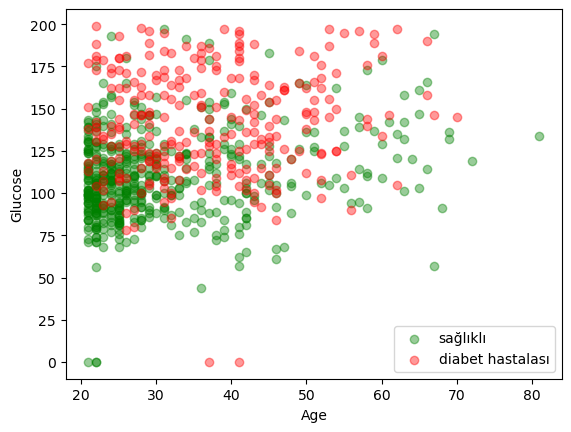

In [18]:
plt.scatter(saglikli_insanlar.Age, saglikli_insanlar.Glucose, color='green', label='sağlıklı', alpha = 0.4)
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, color='red', label='diabet hastalası', alpha = 0.4)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()  
plt.show()

x (bağımsız değişken, örn: şeker hastası olup olmadığı) ve y değişkenlerini (bir insanı şeker hastası veya sağlıklı yapabilecek diğer etkenlerin verileri) belirliyoruz.

In [26]:
# Bağımlı değişkenimiz Outcome'dur. Çünkü bir verisetinde Outcome'un değerini diğer değişkenler belirler.

y = data.Outcome.values

In [30]:
# Geri kalan değişkenler bağımsız değişkenlerdir. drop fonksiyonu ile bağımlı değişkeni sildik ve geriye kalan değişkenler bağımsız değişkenlerden oluştu.

x_ham_veri = data.drop(['Outcome'], axis=1)

Normalizasyon işlemi ile modelin algoritmasının yanılmasını engelliyoruz.

In [33]:
x = (x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))

Normalizasyon öncesi veriler:

In [36]:
x_ham_veri.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Normalizasyon sonrası veriler:

In [39]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.007092,0.174941,0.085106,0.041371,0.000000,0.039716,0.000741,0.059102
1,0.001182,0.100473,0.078014,0.034279,0.000000,0.031442,0.000415,0.036643
2,0.009456,0.216312,0.075650,0.000000,0.000000,0.027541,0.000794,0.037825
3,0.001182,0.105201,0.078014,0.027187,0.111111,0.033215,0.000197,0.024823
4,0.000000,0.161939,0.047281,0.041371,0.198582,0.050946,0.002704,0.039007


Bağımlı ve bağımsız değişkenleri ayırıp normalizasyon işlemi yaptıktan sonra sıra verisetini test ve train olarak ayırmakta.

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x ,y , test_size=0.2 , random_state=1)

KNN modelimizi oluşturup fit ediyoruz:

In [45]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train)

Test veri setimizi kullanarak tahmin işlemi yapıyoruz.

In [50]:
prediction = knn.predict(x_test)
print('k=3 için test verilerimizin doğrulama testi sonucu ', knn.score(x_test, y_test))

k=3 için test verilerimizin doğrulama testi sonucu  0.7402597402597403


En iyi sonuç için n_neighbors değeri kaç olmalı?

In [61]:
sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train, y_train)
    print(sayac, '- Doğruluk oranı: %', knn_yeni.score(x_test, y_test)*100)
    sayac += 1

1 - Doğruluk oranı: % 72.07792207792207
2 - Doğruluk oranı: % 72.72727272727273
3 - Doğruluk oranı: % 74.02597402597402
4 - Doğruluk oranı: % 72.07792207792207
5 - Doğruluk oranı: % 73.37662337662337
6 - Doğruluk oranı: % 77.27272727272727
7 - Doğruluk oranı: % 75.97402597402598
8 - Doğruluk oranı: % 76.62337662337663
9 - Doğruluk oranı: % 76.62337662337663
10 - Doğruluk oranı: % 75.97402597402598


En doğru sonuç için k değeri 8 veya 9 olmalı.

In [65]:
knn = KNeighborsClassifier(n_neighbors = 8).fit(x_train,y_train)

In [67]:
knn.score(x_test, y_test)

0.7662337662337663

Veri setinde olmayan yeni bir hastanın verilerine göre tahmin:

Yeni hastanın verilerini daha hızlı normalizasyon yapabilmek için MinMax scaler kullanalım.

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
sc = MinMaxScaler()
sc.fit_transform(x_ham_veri)

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

Yeni hastanın değerlerini sırasıyla array içinde yazıp predict() fonksiyonunu kullanıyoruz.

In [76]:
new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))

C:\Users\dlara\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\dlara\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [78]:
new_prediction[0]

1